In [1]:
import seaborn as sns; sns.set()
import sys,os
import pandas as pd
import numpy as np
sns.set(style="whitegrid")
import os
import scipy
import matplotlib.pyplot as plt
import pylab
import re

import glob
import pandas as pd
import matplotlib.ticker as ticker

In [65]:
import statistics

In [5]:
##set your directory
#dirpath = os.getcwd()
dirpath_inputs = 'C:\\Users\\merce\\Google Drive\\WBG\\Infrastructure resiliency\\analysis\\criticality\\Input_CSV_Countires\\'
dirpath = 'C:\\Users\\merce\\Google Drive\\WBG\\Infrastructure resiliency\\analysis\\criticality\\'

In [32]:
#get the GDP data and country name codes 
Country_code = pd.read_csv('C:\\Users\\merce\\Google Drive\\WBG\\GDP_1990_2016_WDI_updatedAug2018.csv', 
                           header = 0, 
                           usecols= [0,1],
                          index_col = [0])

In [41]:
##get the country names 

#for filename in os.listdir(os.getcwd()):
CountryList_temp = []


for filename in os.listdir(dirpath_inputs):
    splitResult = filename.split( "_" ) #split on underscores
    CountryName = splitResult[0] #first part of the split is the sequence
    CountryList_temp.append(CountryName)

    
#Exclude smile islands 
#Small_Islands = 

In [43]:
CountryList_temp

AttributeError: 'list' object has no attribute 'to_csv'

In [7]:
#remove countires from the list 

Remove_country_list=['Aruba',
                     'Cuba', 
                     'Czech Republic']

for country in Remove_country_list:
    if country in CountryList:
        CountryList.remove(country)


In [36]:
#build dataframe for all the countries seperatly 

df_dict = {}

for country in CountryList:
    try: 
        df_dict[country] = pd.read_csv(dirpath_inputs + country+'_criticality_res.csv', usecols= ['nwk_pct_destroyed','iteration',
                                                                                                'pct_journeys_isolated',
                                                                                                'average_time_disrupt',
                                                                                                'disrupted_30_pct_plus',
                                                                                                #'total_surp_loss_e1',
                                                                                                'total_pct_surplus_loss_e1',
                                                                                                #'total_surp_loss_e2',
                                                                                                'total_pct_surplus_loss_e2'])
    except:
        print('error occured in country:'+ country)

error occured in country:country
error occured in country:country
error occured in country:Curaçao
error occured in country:Côte d'Ivoire


In [35]:
##clean the data 

for i in df_dict:
    df_dict[i] = df_dict[i][df_dict[i].nwk_pct_destroyed != 0]
    df_dict[i] = df_dict[i].replace(to_replace="--", value =0)
    #print(df_dict[i].head(n=2))
    df_dict[i] = df_dict[i].apply(pd.to_numeric)
    

In [7]:
#computation - make  a sumamry dataframe 
measures= ['nwk_pct_destroyed', 
           'pct_journeys_isolated',
           'average_time_disrupt',
           'disrupted_30_pct_plus',
           #'total_surp_loss_e1',
           'total_pct_surplus_loss_e1', 
           #'total_surp_loss_e2',
           'total_pct_surplus_loss_e2']

stat_summary = ['mean','median', 'std']

In [ ]:
## TO DO: make a global df with summary stats of simulation runs 

In [ ]:
#test 

from pandas import *
files = !ls *.csv # IPython magic
d = concat([read_csv(f, index_col=0, header=None, axis=1) for f in files], keys=files)

In [36]:
def setup(ax):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    #ax.yaxis.set_major_locator(ticker.AutoLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    #ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00, length=5)
    ax.tick_params(which='minor', width=0.75, length=2.5, labelsize=10)
    ax.set_xticks(np.arange(0, 100, step=5))
    #ax.set_yticks(np.arange(0, 1, step=0.2))
    #ax.set_xlim(0, 100)
    #ax.set_ylim(0, 1)
    #ax.patch.set_alpha(0.0)
    sns.set(style="whitegrid")

In [ ]:
## Scatterplot 
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)

#for i in df_dict:
for i in df_dict:
    f, ax = plt.subplots(figsize=(10, 10))
    sns.despine(f, left=True, bottom=True)
    setup(ax)
    sns.scatterplot(x="nwk_pct_destroyed", y="pct_journeys_isolated",
                sizes=(1, 8), linewidth=0,
                data =df_dict[i], ax=ax).set_title(i + '\n Percentage of isolated trips')
    
    #plt.savefig(i + '.png')
    plt.show()
    plt.pause(0.001)
    plt.clf()
    #plt.close()

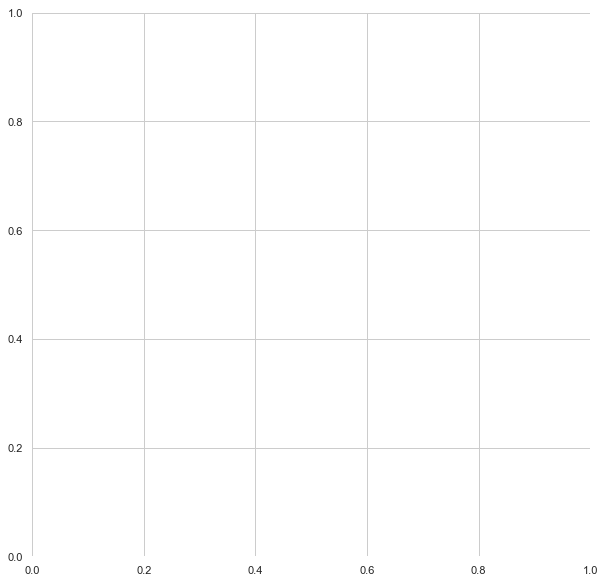

In [40]:
## Boxplots 
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
#setup(ax)
df_dict_tempt = ['Morocco', 'Madagascar', 'Belgium']

#for i in df_dict:
for i in df_dict:
    f, ax = plt.subplots(figsize=(10, 10))
    #ax.yaxis.set_major_locator(plt.NullLocator())
    #setup(ax)
    sns.despine(f, left=True, bottom=True)
    #setup(ax)
    fig = sns.boxplot(x="nwk_pct_destroyed", y="total_pct_surplus_loss_e1",
                data =df_dict[i], 
                orient="v") #+ '\n Percentage of isolated trips')
    fig.set_title(i, fontsize=20)
    #fig.set( xlabel = 'Level of distruption: percentage of disrupted links', ylabel='RFL: percentage of isolated trips')
    
    
    fig.set_xlabel('Level of distruption: percentage of disrupted links',fontsize=20);
    fig.set_ylabel('RFL: percentage of surplus loss e1',fontsize=20);
    
    plt.savefig(dirpath + i + '_total_pct_surplus_loss_e1.png')
    #plt.show()
    #plt.pause(0.001)
    plt.clf()
    plt.close()

In [13]:

####################  SSUMMMAARY TABLES #########################

# get a list of all csv files in target directory
#my_dir = os.getcwd()
my_dir = dirpath_inputs
filelist = []
os.chdir( my_dir )
for files in glob.glob( "*.csv" ) :
    filelist.append(files)
    
df_all = pd.DataFrame()

for f in filelist:
    try:
        # Read csv
        df = pd.read_csv(f)
        splitResult = f.split( "_" ) #split on underscores
        CountryName = splitResult[0]

        #cleaning
        f = df[df.nwk_pct_destroyed != 0]
        df = df.replace(to_replace="--", value =0)
        df = df.drop(columns=['Unnamed: 0','iteration','edges_destroyed'])
        df = df.apply(pd.to_numeric)

        #summary data frames
        df_stat_mean = df.groupby('nwk_pct_destroyed').mean()
        df_stat_med = df.groupby('nwk_pct_destroyed').median()
        df_stat_sd = df.groupby('nwk_pct_destroyed').std()
        df_stat_75 = df.groupby('nwk_pct_destroyed').quantile(0.75)
        df_stat_90 = df.groupby('nwk_pct_destroyed').quantile(0.90)


        #Join
        df_sum_stat = df_stat_mean.join(df_stat_med,how='left', rsuffix='_med')
        df_sum_stat = df_sum_stat .join(df_stat_sd, how='left', rsuffix='_sd')
        df_sum_stat = df_sum_stat .join(df_stat_75, how='left', rsuffix='_75')
        df_sum_stat = df_sum_stat .join(df_stat_90, how='left', rsuffix='_90')


        #Save to csv
        #df_sum_stat.to_csv(CountryName+'.csv')

        #Add column country name and fix indexing
        df_sum_stat['Country']= CountryName
        df_sum_stat.set_index('Country', append=True, inplace=True)
        df_sum_stat = df_sum_stat.reorder_levels(['Country', 'nwk_pct_destroyed'])

        #Append to new data frame 
        df_all = df_all.append(df_sum_stat)
    except:
        print('error occured in country:'+ CountryName)

error occured in country:Cuba
error occured in country:Czech Republic


In [35]:
df_tmt= df_all.groupby(['Country', 'nwk_pct_destroyed'])
#df_tmt.to_csv('SummaryMeasuresAllCountries')
#df_tmt.head()
df_all = df_all.join(Country_code, how = 'left')

df_all.to_csv(dirpath+'Measures_WideTable_Allcountries_NewElco.csv')



In [7]:
#filter to scnarios 20% disruption and 90-% percentile
to_keep = [20]

to_drop = ['total_surp_loss_e1',
           'total_surp_loss_e2',
           'total_surp_loss_e1_med',
           'total_surp_loss_e1_med',
           'total_surp_loss_e1_sd',
           'total_surp_loss_e2_sd'
          ]

df_20 = df_all.iloc[df_all.index.get_level_values('nwk_pct_destroyed') == to_keep]
#df_20 = df_20.drop(to_drop, axis = 1)
df_20 = df_20[['pct_journeys_isolated_90','average_time_disrupt_90','disrupted_30_pct_plus_90','total_pct_surplus_loss_e1_90','total_pct_surplus_loss_e2_90']]

df_20.to_csv(dirpath+'20Disruption_90Percentile.csv')

AttributeError: 'DataFrame' object has no attribute 'nwk_pct_destroyed'

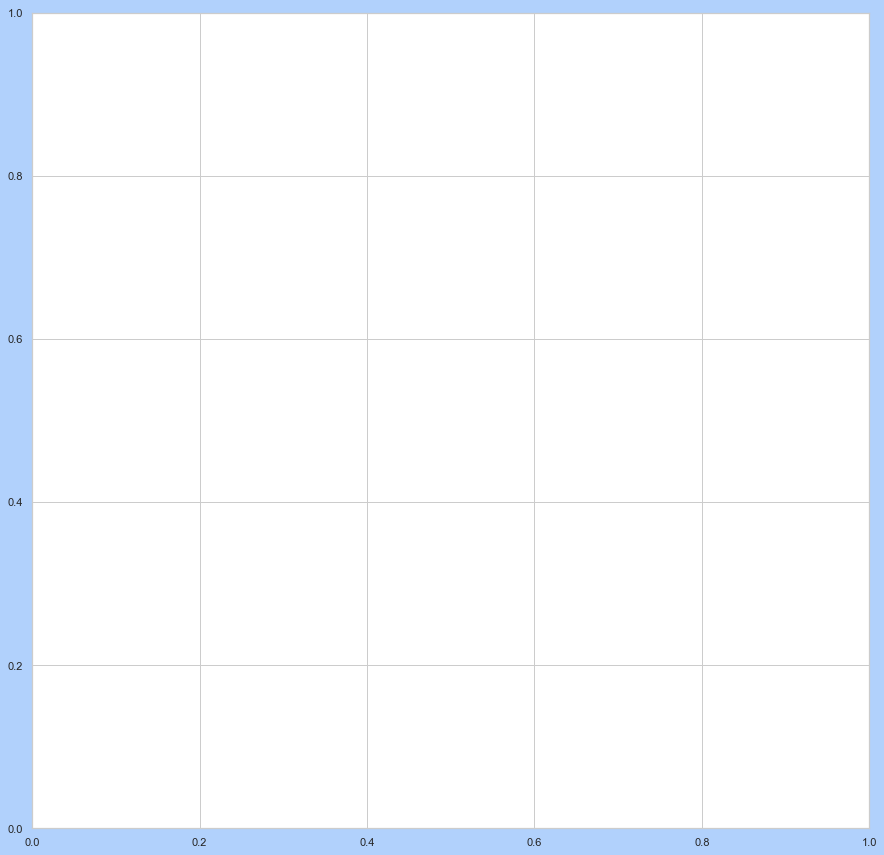

In [48]:
fig, ax = plt.subplots(figsize=(15,15))
fig.patch.set_facecolor('xkcd:powder blue')
#ax.xaxis.set(ticks = range(1,100))
#plt.xticks(rotation=90)
#ax.yaxis.set(ticks = range (0,1))

df_all[ df_all.nwk_pct_destroyed == 20 ].total_pct_surplus_loss_e1.groupby(['nwk_pct_destroyed']).plot(ax=ax)

    # Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5)
plt.show()
#plt.savefig('allcountries_%s.png' % p)

AttributeError: 'Series' object has no attribute 'total_pct_surplus_loss_e1'

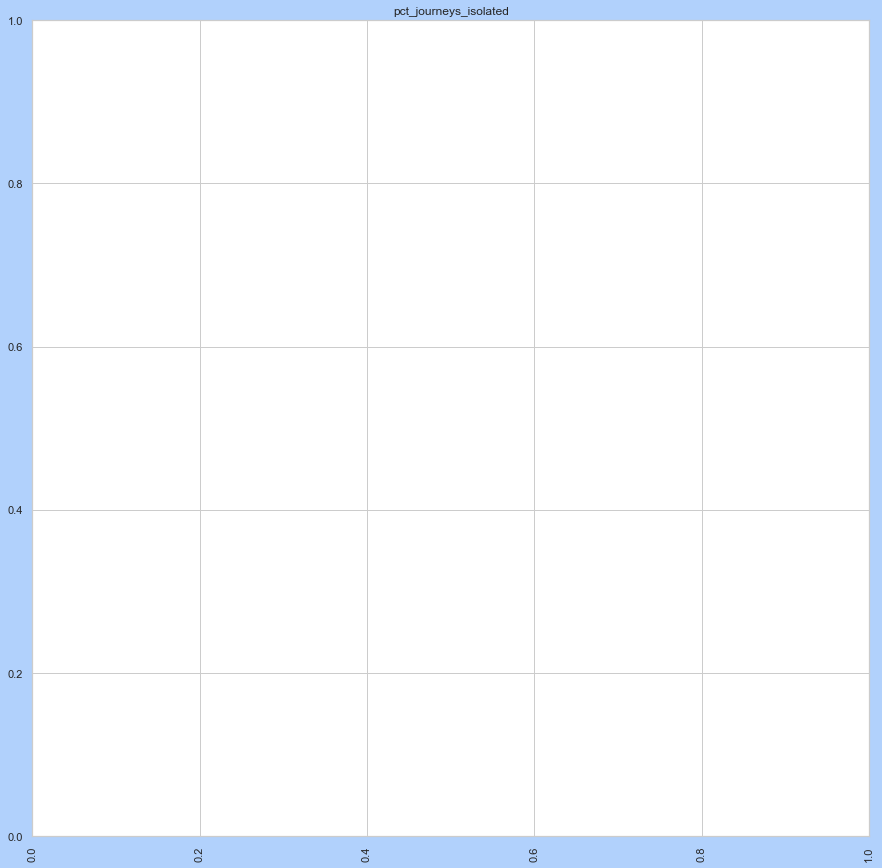

In [43]:
for p in df_all.columns.tolist():
    fig, ax = plt.subplots(figsize=(15,15))
    fig.patch.set_facecolor('xkcd:powder blue')
    ax.set(title=p
           #ylabel='Portion of isolated trips', 
    #      xlabel='Disruption scenario')
    )
    #ax.xaxis.set(ticks = range(1,100))
    plt.xticks(rotation=90)
    #ax.yaxis.set(ticks = range (0,1))

    df_all[p].groupby(['Country']).plot(ax=ax)

    # Place a legend to the right of this smaller subplot.
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig('allcountries_%s.png' % p)
    #plt.show()

ValueError: min() arg is an empty sequence

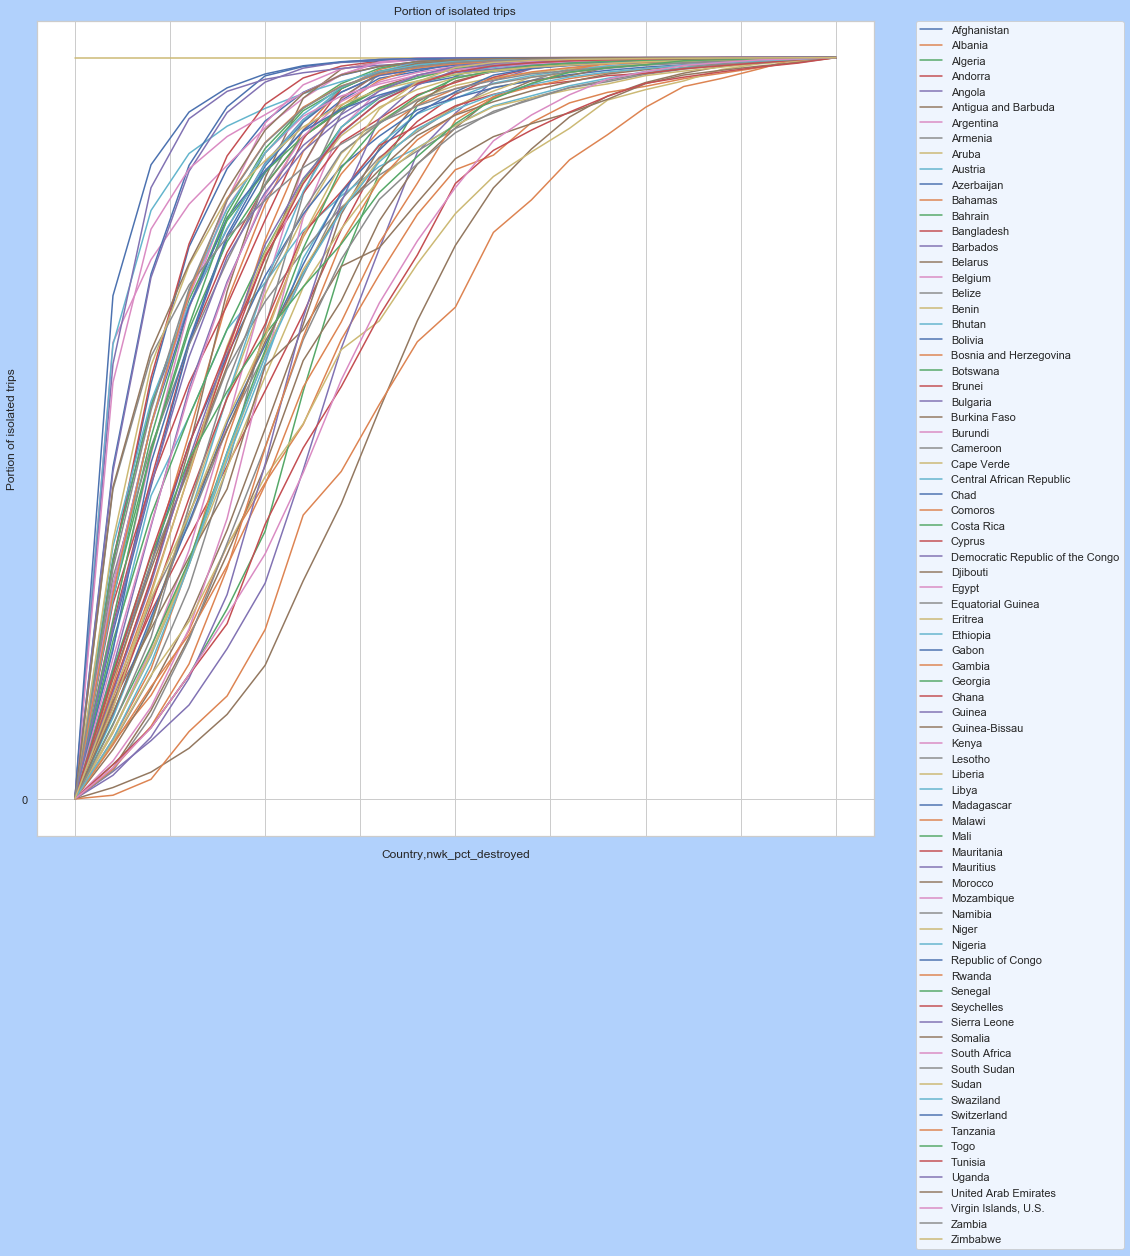

In [63]:

#Interactive plot 


import matplotlib.pyplot as plt
import plotly.tools as tls

mpl_fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
fig.patch.set_facecolor('xkcd:powder blue')
ax.set(title='Portion of isolated trips',
       ylabel='Portion of isolated trips', 
       xlabel='Disruption scenario')
#ax.xaxis.set(ticks = range(1,100))
plt.xticks(rotation=90)
ax.yaxis.set(ticks = range (0,1))
df_all.total_pct_surplus_loss_e1.groupby('Country').plot(ax=ax)

# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plotly_fig = tls.mpl_to_plotly(mpl_fig)

unique_url = py.plot(plotly_fig)

In [59]:
pd.core.DataFrameGroupBy.plot(df_all, x='nwk_pct_destroyed', y='pct_journeys_isolated', 
                      kind='line', 
                      #ax=none, 
                      subplots=True, 
                      sharex=True, 
                      sharey=True, 
                      layout=None, 
                      figsize=(15,15), 
                      use_index=True, 
                      title="test", 
                      grid=None, 
                      legend=True, 
                      style=None, 
                      xticks=range (0,100), 
                      yticks=range (0,1), 
                      xlim=100, 
                      ylim=1, 
                      rot=None, 
                      fontsize=None, 
                      #colormap=None, 
                      #table=False, 
                      #yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds
                     )

AttributeError: module 'pandas.core' has no attribute 'DataFrameGroupBy'